# Tarea 1 Deep Learning
`Estudiante: Sebastián Ignacio Latorre Diaz`

#1.- CNN

## Cargar y preprocesar el conjunto de datos Fashion MNIST


```
(a) Cargar y preprocesar el conjunto de datos Fashion MNIST.

```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Cargar el conjunto de datos Fashion MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocesar los datos
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convertir las etiquetas a one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Construir la CNN


```
(b) Construir una CNN con las siguientes especificaciones:

1.   Una capa convolucional con 32 filtros, tama˜no de kernel de 3x3 y funci´on de activaci´on ReLU.
2.   Una capa de MaxPooling con tama˜no de 2x2.
3.   Una capa convolucional con 64 filtros, tama˜no de kernel de 3x3 y funci´on de activaci´on ReLU.
4.   Una capa de M axP ooling con tama˜no de 2x2.
5.   Una capa densa completamente conectada con 128 unidades y funci´on de activaci´on ReLU.
6.   Una capa de salida con 10 unidades (una por cada clase) y funci´on de activaci´on sof tmax.
7.   Compilar el modelo utilizando el optimizador Adam y la funci´on de p´erdida categorical crossentropy.

```





In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.models import Model

# Definir la entrada
input_layer = Input(shape=(28, 28, 1))

# Construir la CNN
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(10, activation='softmax')(x)

# Crear el modelo
model = Model(inputs=input_layer, outputs=output_layer)

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Entrenar y validar el modelo

```
(c) Entrenar el modelo en el conjunto de datos de entrenamiento y validarlo en el conjunto de datos de prueba

```

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.7816 - loss: 0.6085 - val_accuracy: 0.8712 - val_loss: 0.3493
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8921 - loss: 0.2987 - val_accuracy: 0.8947 - val_loss: 0.2850
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9062 - loss: 0.2496 - val_accuracy: 0.8819 - val_loss: 0.3146
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9206 - loss: 0.2136 - val_accuracy: 0.9048 - val_loss: 0.2525
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9299 - loss: 0.1872 - val_accuracy: 0.9077 - val_loss: 0.2620
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9404 - loss: 0.1619 - val_accuracy: 0.9090 - val_loss: 0.2536
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9470 - loss: 0.1427 - val_accuracy: 0.9118 - val_loss: 0.2555
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9539 - loss: 0.1236 -

## Evaluar el modelo

```
(d) Evaluar el modelo en el conjunto de datos de prueba y mostrar la precisi´on.

```

In [ ]:
# Evaluar el modelo en el conjunto de datos de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nPrecisión en el conjunto de datos de prueba: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9105 - loss: 0.2975

Precisión en el conjunto de datos de prueba: 0.9124000072479248


## Visualizar predicciones correctas e incorrectas

```
(e) Visualizar algunos ejemplos de predicciones correctas e incorrectas del conjunto de datos de prueba.
```

In [ ]:
# Obtener predicciones
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Identificar ejemplos correctos e incorrectos
correct = np.where(predicted_classes == true_classes)[0]
incorrect = np.where(predicted_classes != true_classes)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Predicciones correctas:


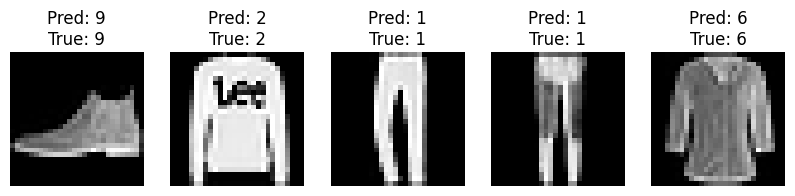

In [ ]:
# Visualizar ejemplos de predicciones correctas
print("Predicciones correctas:")
plt.figure(figsize=(10, 5))
for i, idx in enumerate(correct[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_classes[idx]}\nTrue: {true_classes[idx]}")
    plt.axis('off')
plt.show()


Predicciones incorrectas:


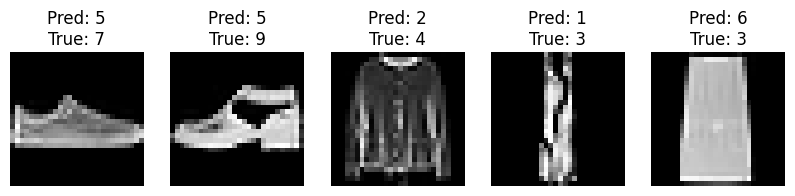

In [ ]:
# Visualizar ejemplos de predicciones incorrectas
print("Predicciones incorrectas:")
plt.figure(figsize=(10, 5))
for i, idx in enumerate(incorrect[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_classes[idx]}\nTrue: {true_classes[idx]}")
    plt.axis('off')
plt.show()

# 2.- Ablation Study

```
Ablation Study: Realize un ablation study, es decir, entrene una red similar a la anterior y modfique lo que le
parezca conveniente para intentar obtener mejores resultados.
```

In [ ]:
# Construir una CNN modificada
input_layer_ablation = Input(shape=(28, 28, 1))

x_ablation = Conv2D(64, (3, 3), activation='relu')(input_layer_ablation)  # Cambiamos el número de filtros a 64
x_ablation = MaxPooling2D((2, 2))(x_ablation)
x_ablation = Conv2D(128, (3, 3), activation='relu')(x_ablation)  # Aumentamos el número de filtros a 128
x_ablation = MaxPooling2D((2, 2))(x_ablation)
x_ablation = Flatten()(x_ablation)
x_ablation = Dense(256, activation='relu')(x_ablation)  # Aumentamos el número de unidades a 256
output_layer_ablation = Dense(10, activation='softmax')(x_ablation)

# Crear el modelo
model_ablation = Model(inputs=input_layer_ablation, outputs=output_layer_ablation)

# Compilar el modelo
model_ablation.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_ablation = model_ablation.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluar el modelo en el conjunto de datos de prueba
test_loss_ablation, test_acc_ablation = model_ablation.evaluate(X_test, y_test)
print(f'\nPrecisión en el conjunto de datos de prueba (Ablation Study): {test_acc_ablation}')


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7948 - loss: 0.5632 - val_accuracy: 0.8804 - val_loss: 0.3267
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9008 - loss: 0.2745 - val_accuracy: 0.8988 - val_loss: 0.2733
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9178 - loss: 0.2219 - val_accuracy: 0.8956 - val_loss: 0.2754
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9317 - loss: 0.1820 - val_accuracy: 0.9084 - val_loss: 0.2516
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9428 - loss: 0.1509 - val_accuracy: 0.9115 - val_loss: 0.2541
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9537 - loss: 0.1258 - val_accuracy: 0.9047 - val_loss: 0.2908
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9610 - loss: 0.1061 - val_accuracy: 0.9169 - val_loss: 0.2636
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9675 - loss: 0.0836 -